# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline




In [ ]:
img = cv2.imread('/content/sara3.jpg')


In [ ]:
img.shape

(531, 850, 3)

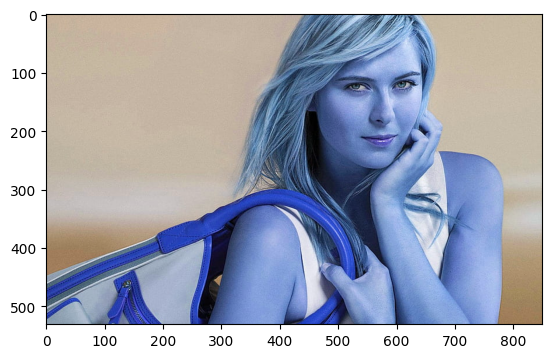

In [ ]:
plt.imshow(img)

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(531, 850)

array([[173, 174, 174, ..., 179, 178, 178],
       [178, 177, 176, ..., 179, 179, 179],
       [177, 177, 176, ..., 179, 181, 181],
       ...,
       [166, 167, 168, ..., 116, 119, 120],
       [164, 166, 167, ..., 116, 116, 116],
       [161, 164, 167, ..., 115, 114, 114]], dtype=uint8)
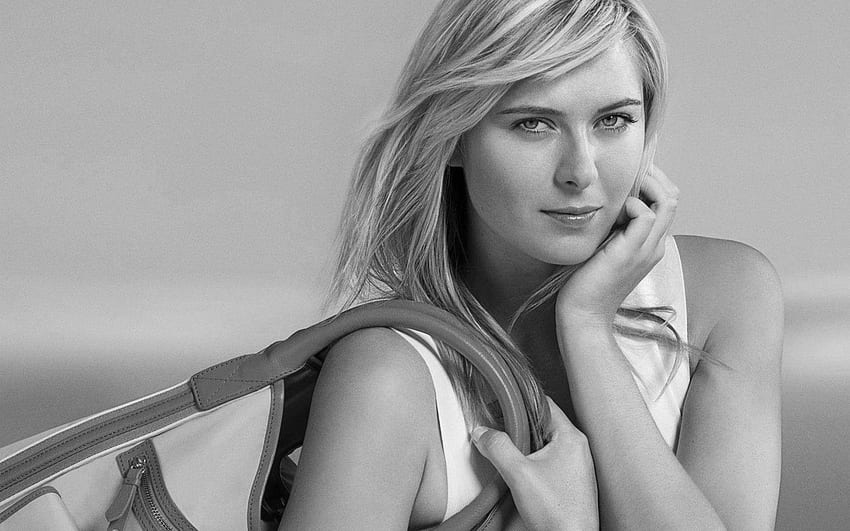

In [ ]:
gray

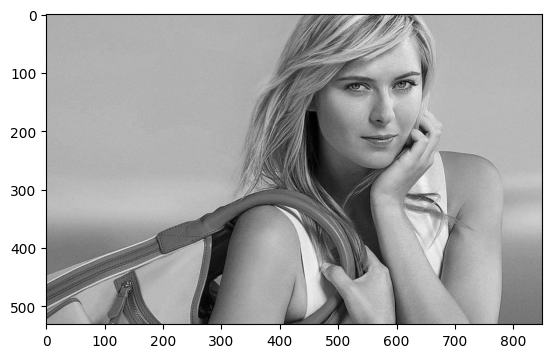

In [ ]:
plt.imshow(gray, cmap='gray')

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray)
eyes = eye_cascade.detectMultiScale(gray)
eyes

array([[589,  99,  44,  44],
       [506,  98,  51,  51]], dtype=int32)

In [ ]:
#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
#eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

#faces = face_cascade.detectMultiScale(gray)
#eyes = eye_cascade.detectMultiScale(gray)
#eyes

In [ ]:
x,y,w,h = faces[0]

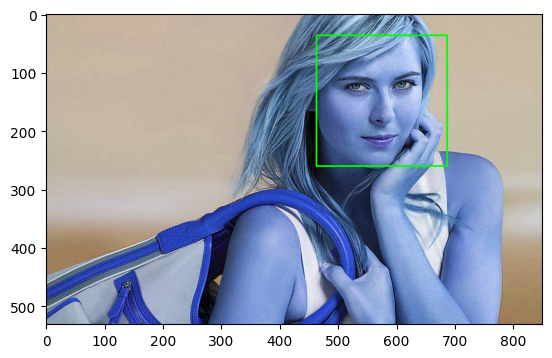

In [ ]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
plt.imshow(face_img)

In [ ]:
x,y,w,h = eyes[0]

In [ ]:
ax,ay,aw,ah = eyes[1]

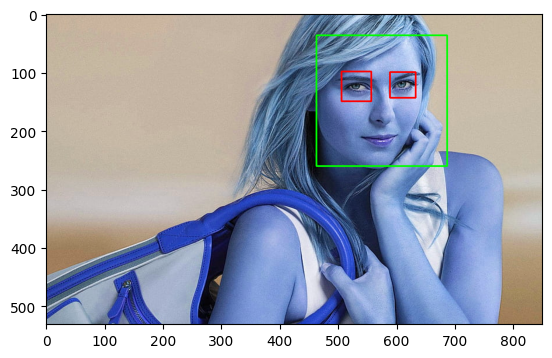

In [ ]:

eye_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(eye_img)

eye_img = cv2.rectangle(img,(ax,ay),(ax+aw,ay+ah),(255,0,0),2)
plt.imshow(eye_img)

In [ ]:
x,y,w,h = faces[0]

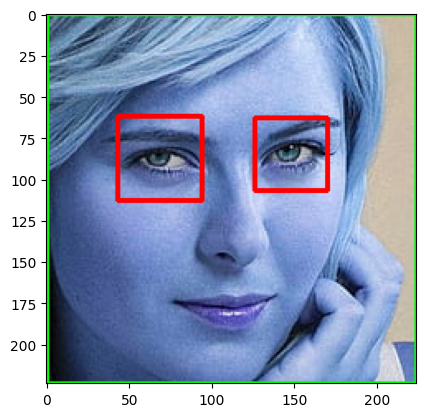

In [ ]:
cropped_image = face_img[y:y+w,x:x+h]
plt.imshow(cropped_image)

In [ ]:
cropped_image.shape

(224, 224, 3)

In [ ]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

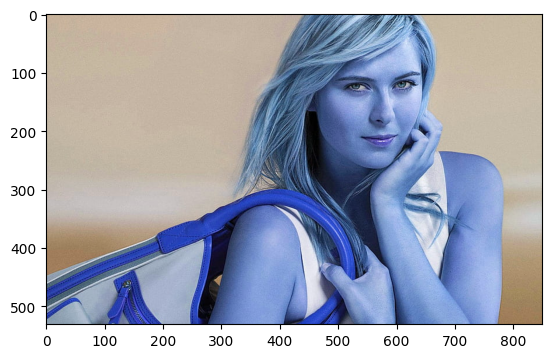

In [ ]:

original_image = cv2.imread("/content/sara3.jpg")
plt.imshow(original_image)

In [ ]:
path_to_data = "/content/sample_data/celebrity"
path_to_cr_data = '/content/sample_data/celebrity/cropped'

In [ ]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [ ]:
img_dirs

['/content/sample_data/celebrity/Lionel_Messi',
 '/content/sample_data/celebrity/.ipynb_checkpoints',
 '/content/sample_data/celebrity/Virat_Kohli',
 '/content/sample_data/celebrity/Roger_Federer',
 '/content/sample_data/celebrity/Maria_Sarapova',
 '/content/sample_data/celebrity/Serena_williams']

In [ ]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [ ]:
img_2 = img_dirs[0:6]
img_2 = img_2[1:]
img_2


['/content/sample_data/celebrity/.ipynb_checkpoints',
 '/content/sample_data/celebrity/Virat_Kohli',
 '/content/sample_data/celebrity/Roger_Federer',
 '/content/sample_data/celebrity/Maria_Sarapova',
 '/content/sample_data/celebrity/Serena_williams']

In [ ]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)

            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Lionel_Messi
Generating cropped images in folder:  /content/sample_data/celebrity/croppedLionel_Messi
.ipynb_checkpoints
Virat_Kohli
Roger_Federer
Maria_Sarapova
Generating cropped images in folder:  /content/sample_data/celebrity/croppedMaria_Sarapova
Serena_williams
Generating cropped images in folder:  /content/sample_data/celebrity/croppedSerena_williams


In [ ]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'croppedLionel_Messi': ['/content/sample_data/celebrity/croppedLionel_Messi/Lionel_Messi1.png'],
 'croppedMaria_Sarapova': ['/content/sample_data/celebrity/croppedMaria_Sarapova/Maria_Sarapova3.png',
  '/content/sample_data/celebrity/croppedMaria_Sarapova/Maria_Sarapova1.png',
  '/content/sample_data/celebrity/croppedMaria_Sarapova/Maria_Sarapova2.png'],
 'croppedSerena_williams': ['/content/sample_data/celebrity/croppedSerena_williams/Serena_williams1.png']}

In [ ]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'croppedLionel_Messi': 0,
 'croppedMaria_Sarapova': 1,
 'croppedSerena_williams': 2}